# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [9]:
# Libraries
import pandas as pd
import numpy as np

---
## Step 0: Load The Data

In [10]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data

training_file = os.path.join( 'data', 'train.p')
validation_file= os.path.join( 'data', 'valid.p')
testing_file = os.path.join( 'data', 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [67]:
import numpy as np
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


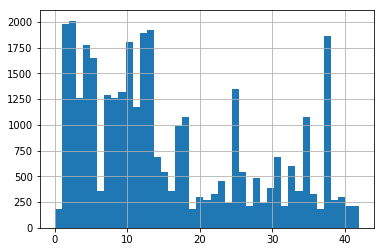

In [68]:
Y_train_array = pd.DataFrame(y_train, columns=['class'], dtype=np.int8)
hist = Y_train_array['class'].hist(bins = 43)

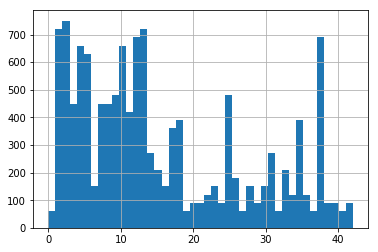

In [13]:
Y_test_array = pd.DataFrame(y_test, columns=['class'], dtype=np.int8)
hist = Y_test_array['class'].hist(bins = 43)

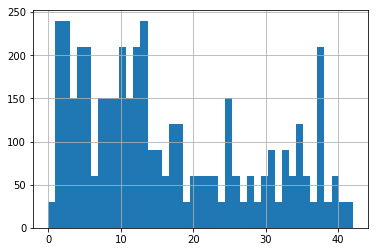

In [14]:
Y_validation_array = pd.DataFrame(y_valid, columns=['class'], dtype=np.int8)
hist = Y_validation_array['class'].hist(bins = 43)

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [15]:
type(y_train)

numpy.ndarray

In [16]:
import pandas as pd
train_array = pd.DataFrame(y_train, columns=['class'], dtype=np.int8)# dtype=np.str)
#train_array['class'].value_counts()

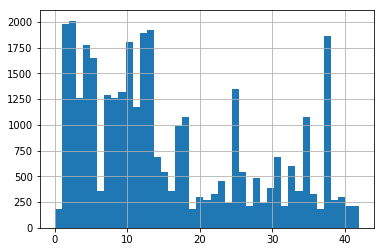

In [17]:
hist = train_array['class'].hist(bins = 43)

In [18]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

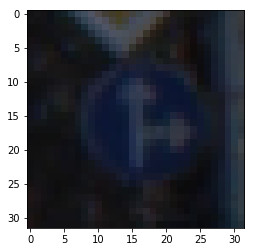

In [19]:
plt.imshow(X_train[1000])

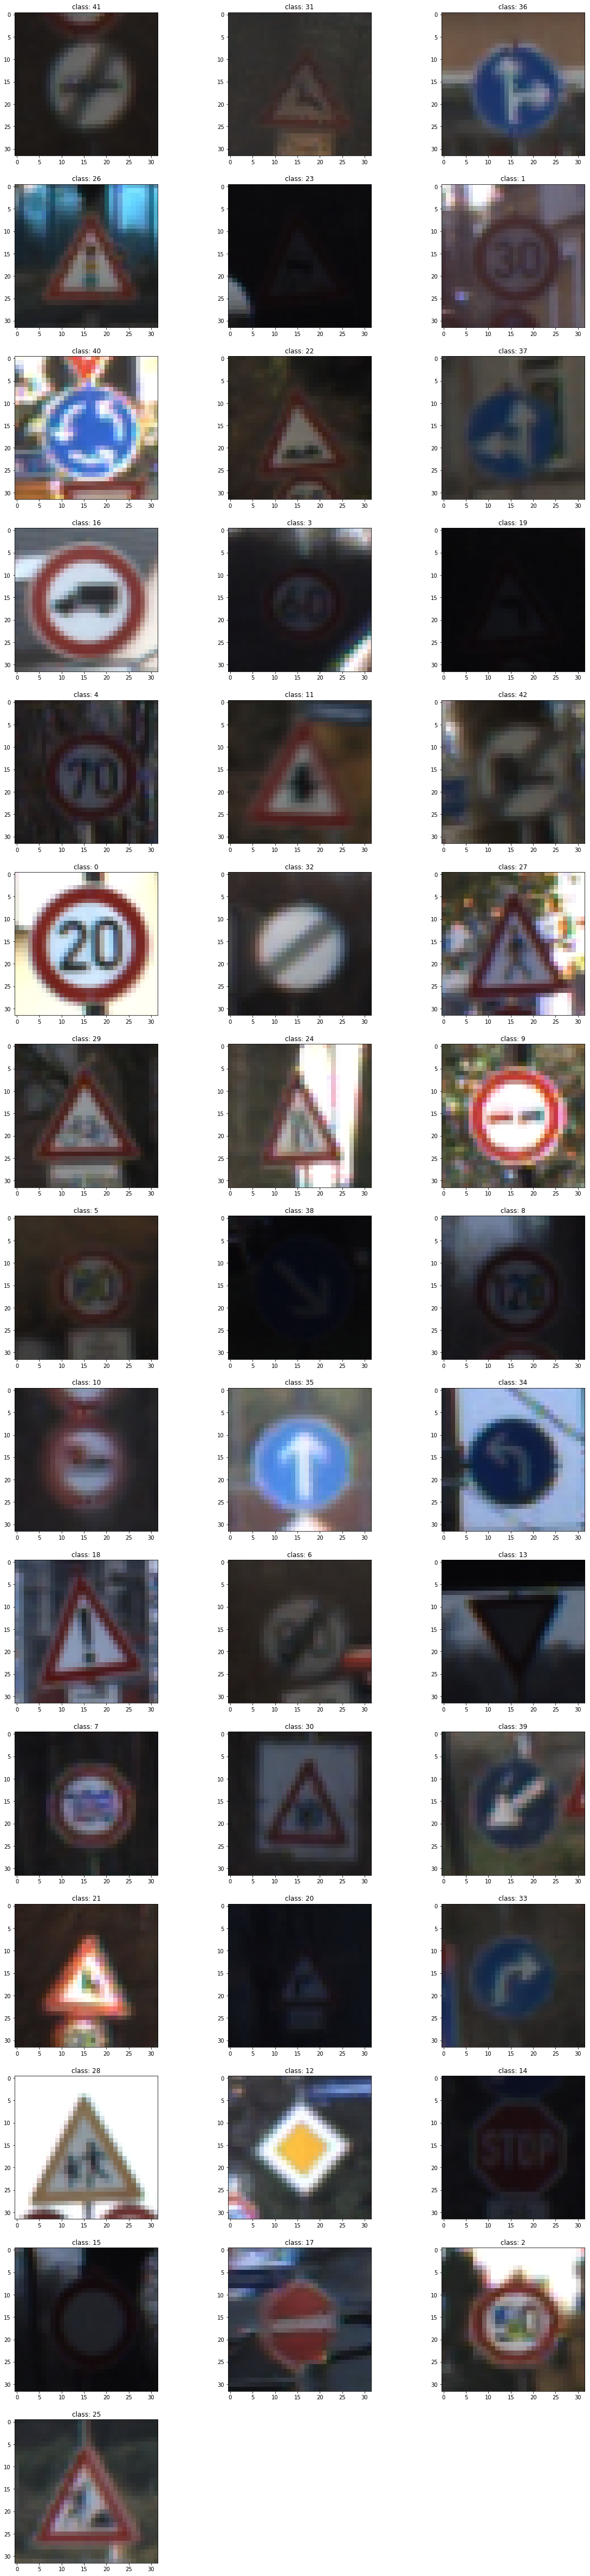

In [50]:
# print one of each distinct sample
uniques = len(train_array['class'].unique())
counter = 0

plt.figure(figsize=(20,250))

for it in train_array['class'].unique():
    indexes = train_array.loc[train_array['class']==it].index.tolist()
    image = X_train[indexes[5]]
    plt.subplot(uniques, 3, counter+1)
    plt.title('class: {0}'.format(it))
    plt.imshow(image)
    counter += 1

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Upsample under-represented classes

In [21]:
def apply_to_array(array, img_func):
    
    ans_array = []

    for itm in array:
        proc = img_func(itm)
        #proc = np.expand_dims(proc, axis=2)
        ans_array.append(proc)

    numpy_arr = np.array(ans_array)
    
    return numpy_arr

In [22]:
# build a jitter function
import skimage as sk

def jitter_func(array: np.ndarray):
    assert len(array.shape) == 3
    assert array.shape[2] == 3
    
    result = sk.util.random_noise(array, mode='gaussian') 
    #result = result*255
    
    # explore this one sometimes the noise image is very different?
    mean_ratio = np.mean(array) / np.mean(result) 
    #assert (mean_ratio >= 0.8)
    
    return result 

In [23]:
import random

def random_rotation(image_array: np.ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)


class: 41, class_size: 210, resamples: 290
class: 36, class_size: 330, resamples: 170
class: 23, class_size: 450, resamples: 50
class: 40, class_size: 300, resamples: 200
class: 22, class_size: 330, resamples: 170
class: 37, class_size: 180, resamples: 320
class: 16, class_size: 360, resamples: 140
class: 19, class_size: 180, resamples: 320
class: 42, class_size: 210, resamples: 290
class: 0, class_size: 180, resamples: 320
class: 32, class_size: 210, resamples: 290
class: 27, class_size: 210, resamples: 290
class: 29, class_size: 240, resamples: 260
class: 24, class_size: 240, resamples: 260
class: 34, class_size: 360, resamples: 140
class: 6, class_size: 360, resamples: 140
class: 30, class_size: 390, resamples: 110
class: 39, class_size: 270, resamples: 230
class: 21, class_size: 270, resamples: 230
class: 20, class_size: 300, resamples: 200
class: 28, class_size: 480, resamples: 20


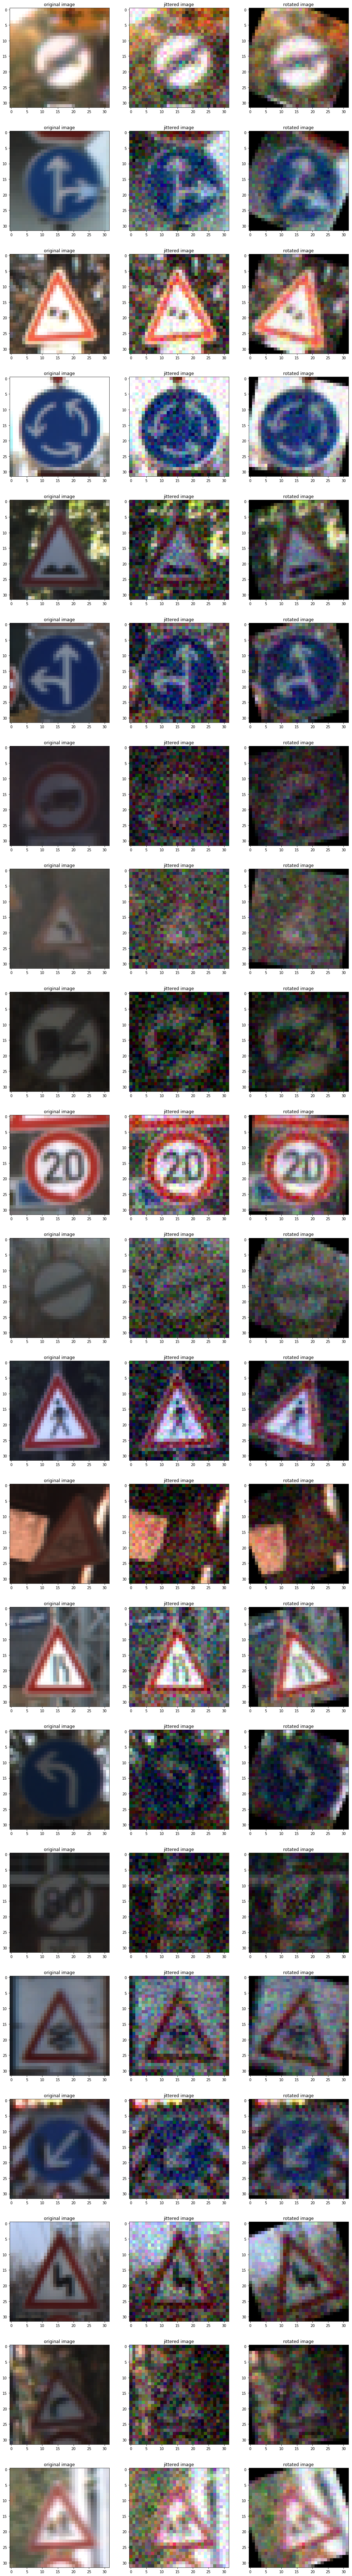

In [74]:
resample_threshold = 500

res_train_X = X_train
res_train_Y = y_train

plt.figure(figsize=(17,len(train_array['class'].unique())*19))
counter = 0
uniques = len(train_array['class'].unique())

for it in train_array['class'].unique():
    indexes = train_array.loc[train_array['class']==it].index.tolist()
    if len(indexes) < resample_threshold:
        diff = resample_threshold - len(indexes)
        sample = np.random.choice(indexes, diff, replace=True)
        print('class: {0}, class_size: {1}, resamples: {2}'.format(it, len(indexes), len(sample)))
        extras_X = np.take(X_train, sample, axis = 0)
        extras_Y = np.take(y_train, sample)
        
        extras_X_jit = apply_to_array(extras_X, jitter_func)
        extras_X_rot = apply_to_array(extras_X_jit, random_rotation)
        
        plt.subplot(uniques*3, 3, counter+1)
        plt.title('original image')
        plt.imshow(extras_X[1])
        plt.subplot(uniques*3, 3, counter+2)
        plt.title('jittered image')
        plt.imshow(extras_X_jit[1])
        plt.subplot(uniques*3, 3, counter+3)
        plt.title('rotated image')
        plt.imshow(extras_X_rot[1])
        counter += 3
    
        #print('mean before: {0}, mean after: {1}'.format(np.mean(extras_X), np.mean(extras_X_jit) ))
    
        res_train_X = np.append(res_train_X, extras_X_rot, axis = 0 )
        res_train_Y = np.append(res_train_Y, extras_Y )
        

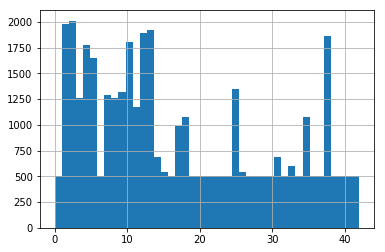

In [25]:
resamp_train_array = pd.DataFrame(res_train_Y, columns=['class'], dtype=np.int8)
hist = resamp_train_array['class'].hist(bins = 43)

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [26]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

In [27]:
import tensorflow as tf

In [28]:
# Dataset for preproc
X_toUse = res_train_X

In [29]:
# Normalise
#X_train_proc = (X_toUse - 128)/128
#X_valid_proc = (X_valid - 128)/128

X_train_proc = X_toUse/256
X_valid_proc = X_valid/256


In [30]:
import cv2

def greyscaler(array):
    assert len(array.shape) == 3
    assert array.shape[2] == 3
    img = np.array(array, dtype=np.uint8) # fix for numpy data type
    result = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) 
    
    return result 

In [31]:
greyscale_X = apply_to_array(X_train_proc, greyscaler)
greyscale_valid = apply_to_array(X_valid_proc, greyscaler)

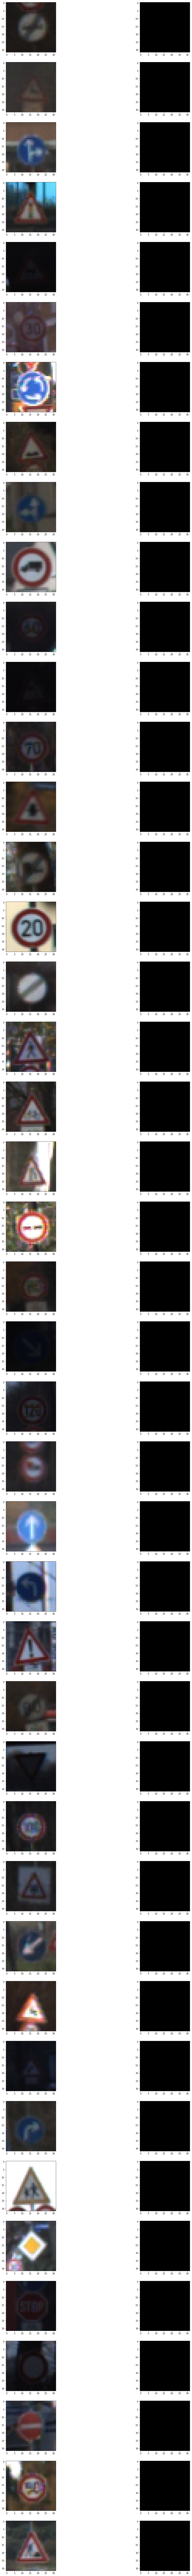

In [32]:
plt.figure(figsize=(20,len(train_array['class'].unique())*10))
counter = 0
for it in train_array['class'].unique():
    indexes = train_array.loc[train_array['class']==it].index.tolist()
    image = X_train[indexes[1]]
    plt.subplot(uniques*2, 2, counter+1)
    plt.title('original image')
    plt.imshow(image)
    plt.subplot(uniques*2, 2, counter+2)
    plt.title('greyscale image')
    plt.imshow(greyscale_X[indexes[1]], cmap='gray')
    counter += 2

### Model Architecture

In [33]:
# Use LeNet

from tensorflow.contrib.layers import flatten

    
def LeNet(x):    
    #x = tf.image.rgb_to_grayscale(x)
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # drop out
    drop_1 = tf.nn.dropout(fc1, kp_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(drop_1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # drop out
    drop_2 = tf.nn.dropout(fc2, kp_prob)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(drop_2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [34]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

In [55]:
EPOCHS = 10001
BATCH_SIZE = 256
X_train_dataset = X_train_proc # X_train_proc
Y_train_dataset = res_train_Y

X_valid_dataset = X_valid_proc
Y_valid_dataset = y_valid

In [36]:
# placeholders
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
kp_prob = tf.placeholder(tf.float32)

In [37]:
rate = 0.0009

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [38]:
# model evaluation

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, kp_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [56]:
# replace with keras?
# have issues with the training loop cause of the batching shuffle in the epoch loop I think?
saver = tf.train.Saver()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(EPOCHS):
        #image_batch, label_batch = tf.train.shuffle_batch([X_train_proc, y_train], enqueue_many=True, 
        #                               batch_size=BATCH_SIZE, capacity=10000, min_after_dequeue=10, 
        #                               allow_smaller_final_batch=True)
        permutation=np.random.permutation(len(X_train_dataset))
        permutation=permutation[0:BATCH_SIZE]
        batch=[X_train_dataset[permutation],Y_train_dataset[permutation]]
        
        sess.run(training_operation, feed_dict={x: batch[0], y: batch[1], kp_prob: 0.35})
        train_accuracy = evaluate(X_train_dataset, Y_train_dataset)
        validation_accuracy = evaluate(X_valid_dataset, Y_valid_dataset)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f} Train Accuracy = {:.3f}".format(validation_accuracy, train_accuracy))
        print()
        
        if i % 10 == 0:
            save_path = saver.save(sess, "model/model_" + str(i) + ".ckpt")
            print("Model saved in path: %s" % save_path)
    

EPOCH 1 ...
Validation Accuracy = 0.046 Train Accuracy = 0.040

Model saved in path: model/model_0.ckpt
EPOCH 2 ...
Validation Accuracy = 0.062 Train Accuracy = 0.055

EPOCH 3 ...
Validation Accuracy = 0.068 Train Accuracy = 0.055

EPOCH 4 ...
Validation Accuracy = 0.068 Train Accuracy = 0.056

EPOCH 5 ...
Validation Accuracy = 0.064 Train Accuracy = 0.055

EPOCH 6 ...
Validation Accuracy = 0.059 Train Accuracy = 0.053

EPOCH 7 ...
Validation Accuracy = 0.058 Train Accuracy = 0.052

EPOCH 8 ...
Validation Accuracy = 0.056 Train Accuracy = 0.051

EPOCH 9 ...
Validation Accuracy = 0.055 Train Accuracy = 0.051

EPOCH 10 ...
Validation Accuracy = 0.054 Train Accuracy = 0.051

EPOCH 11 ...
Validation Accuracy = 0.054 Train Accuracy = 0.051

Model saved in path: model/model_10.ckpt
EPOCH 12 ...
Validation Accuracy = 0.054 Train Accuracy = 0.051

EPOCH 13 ...
Validation Accuracy = 0.054 Train Accuracy = 0.051

EPOCH 14 ...
Validation Accuracy = 0.054 Train Accuracy = 0.051

EPOCH 15 ...
Valid

EPOCH 120 ...
Validation Accuracy = 0.226 Train Accuracy = 0.221

EPOCH 121 ...
Validation Accuracy = 0.228 Train Accuracy = 0.225

Model saved in path: model/model_120.ckpt
EPOCH 122 ...
Validation Accuracy = 0.232 Train Accuracy = 0.229

EPOCH 123 ...
Validation Accuracy = 0.236 Train Accuracy = 0.231

EPOCH 124 ...
Validation Accuracy = 0.238 Train Accuracy = 0.233

EPOCH 125 ...
Validation Accuracy = 0.240 Train Accuracy = 0.233

EPOCH 126 ...
Validation Accuracy = 0.245 Train Accuracy = 0.238

EPOCH 127 ...
Validation Accuracy = 0.253 Train Accuracy = 0.245

EPOCH 128 ...
Validation Accuracy = 0.257 Train Accuracy = 0.250

EPOCH 129 ...
Validation Accuracy = 0.257 Train Accuracy = 0.253

EPOCH 130 ...
Validation Accuracy = 0.257 Train Accuracy = 0.253

EPOCH 131 ...
Validation Accuracy = 0.258 Train Accuracy = 0.252

Model saved in path: model/model_130.ckpt
EPOCH 132 ...
Validation Accuracy = 0.260 Train Accuracy = 0.252

EPOCH 133 ...
Validation Accuracy = 0.263 Train Accuracy =

EPOCH 237 ...
Validation Accuracy = 0.341 Train Accuracy = 0.336

EPOCH 238 ...
Validation Accuracy = 0.348 Train Accuracy = 0.343

EPOCH 239 ...
Validation Accuracy = 0.359 Train Accuracy = 0.349

EPOCH 240 ...
Validation Accuracy = 0.362 Train Accuracy = 0.355

EPOCH 241 ...
Validation Accuracy = 0.366 Train Accuracy = 0.358

Model saved in path: model/model_240.ckpt
EPOCH 242 ...
Validation Accuracy = 0.372 Train Accuracy = 0.362

EPOCH 243 ...
Validation Accuracy = 0.377 Train Accuracy = 0.366

EPOCH 244 ...
Validation Accuracy = 0.377 Train Accuracy = 0.370

EPOCH 245 ...
Validation Accuracy = 0.380 Train Accuracy = 0.374

EPOCH 246 ...
Validation Accuracy = 0.378 Train Accuracy = 0.377

EPOCH 247 ...
Validation Accuracy = 0.383 Train Accuracy = 0.380

EPOCH 248 ...
Validation Accuracy = 0.389 Train Accuracy = 0.382

EPOCH 249 ...
Validation Accuracy = 0.390 Train Accuracy = 0.383

EPOCH 250 ...
Validation Accuracy = 0.387 Train Accuracy = 0.382

EPOCH 251 ...
Validation Accuracy 

EPOCH 354 ...
Validation Accuracy = 0.411 Train Accuracy = 0.410

EPOCH 355 ...
Validation Accuracy = 0.422 Train Accuracy = 0.427

EPOCH 356 ...
Validation Accuracy = 0.433 Train Accuracy = 0.440

EPOCH 357 ...
Validation Accuracy = 0.439 Train Accuracy = 0.445

EPOCH 358 ...
Validation Accuracy = 0.441 Train Accuracy = 0.446

EPOCH 359 ...
Validation Accuracy = 0.439 Train Accuracy = 0.444

EPOCH 360 ...
Validation Accuracy = 0.442 Train Accuracy = 0.443

EPOCH 361 ...
Validation Accuracy = 0.441 Train Accuracy = 0.444

Model saved in path: model/model_360.ckpt
EPOCH 362 ...
Validation Accuracy = 0.441 Train Accuracy = 0.446

EPOCH 363 ...
Validation Accuracy = 0.442 Train Accuracy = 0.447

EPOCH 364 ...
Validation Accuracy = 0.444 Train Accuracy = 0.448

EPOCH 365 ...
Validation Accuracy = 0.441 Train Accuracy = 0.449

EPOCH 366 ...
Validation Accuracy = 0.442 Train Accuracy = 0.450

EPOCH 367 ...
Validation Accuracy = 0.445 Train Accuracy = 0.451

EPOCH 368 ...
Validation Accuracy 

EPOCH 472 ...
Validation Accuracy = 0.487 Train Accuracy = 0.487

EPOCH 473 ...
Validation Accuracy = 0.489 Train Accuracy = 0.488

EPOCH 474 ...
Validation Accuracy = 0.488 Train Accuracy = 0.491

EPOCH 475 ...
Validation Accuracy = 0.487 Train Accuracy = 0.494

EPOCH 476 ...
Validation Accuracy = 0.489 Train Accuracy = 0.497

EPOCH 477 ...
Validation Accuracy = 0.494 Train Accuracy = 0.501

EPOCH 478 ...
Validation Accuracy = 0.501 Train Accuracy = 0.504

EPOCH 479 ...
Validation Accuracy = 0.502 Train Accuracy = 0.507

EPOCH 480 ...
Validation Accuracy = 0.506 Train Accuracy = 0.510

EPOCH 481 ...
Validation Accuracy = 0.509 Train Accuracy = 0.511

Model saved in path: model/model_480.ckpt
EPOCH 482 ...
Validation Accuracy = 0.509 Train Accuracy = 0.513

EPOCH 483 ...
Validation Accuracy = 0.507 Train Accuracy = 0.514

EPOCH 484 ...
Validation Accuracy = 0.504 Train Accuracy = 0.512

EPOCH 485 ...
Validation Accuracy = 0.504 Train Accuracy = 0.510

EPOCH 486 ...
Validation Accuracy 

EPOCH 590 ...
Validation Accuracy = 0.566 Train Accuracy = 0.564

EPOCH 591 ...
Validation Accuracy = 0.564 Train Accuracy = 0.563

Model saved in path: model/model_590.ckpt
EPOCH 592 ...
Validation Accuracy = 0.561 Train Accuracy = 0.557

EPOCH 593 ...
Validation Accuracy = 0.559 Train Accuracy = 0.553

EPOCH 594 ...
Validation Accuracy = 0.560 Train Accuracy = 0.553

EPOCH 595 ...
Validation Accuracy = 0.560 Train Accuracy = 0.557

EPOCH 596 ...
Validation Accuracy = 0.560 Train Accuracy = 0.560

EPOCH 597 ...
Validation Accuracy = 0.561 Train Accuracy = 0.560

EPOCH 598 ...
Validation Accuracy = 0.564 Train Accuracy = 0.559

EPOCH 599 ...
Validation Accuracy = 0.569 Train Accuracy = 0.555

EPOCH 600 ...
Validation Accuracy = 0.568 Train Accuracy = 0.554

EPOCH 601 ...
Validation Accuracy = 0.569 Train Accuracy = 0.555

Model saved in path: model/model_600.ckpt
EPOCH 602 ...
Validation Accuracy = 0.567 Train Accuracy = 0.557

EPOCH 603 ...
Validation Accuracy = 0.570 Train Accuracy =

EPOCH 707 ...
Validation Accuracy = 0.628 Train Accuracy = 0.622

EPOCH 708 ...
Validation Accuracy = 0.630 Train Accuracy = 0.624

EPOCH 709 ...
Validation Accuracy = 0.634 Train Accuracy = 0.627

EPOCH 710 ...
Validation Accuracy = 0.637 Train Accuracy = 0.631

EPOCH 711 ...
Validation Accuracy = 0.644 Train Accuracy = 0.640

Model saved in path: model/model_710.ckpt
EPOCH 712 ...
Validation Accuracy = 0.649 Train Accuracy = 0.650

EPOCH 713 ...
Validation Accuracy = 0.651 Train Accuracy = 0.646

EPOCH 714 ...
Validation Accuracy = 0.648 Train Accuracy = 0.641

EPOCH 715 ...
Validation Accuracy = 0.641 Train Accuracy = 0.637

EPOCH 716 ...
Validation Accuracy = 0.638 Train Accuracy = 0.635

EPOCH 717 ...
Validation Accuracy = 0.643 Train Accuracy = 0.639

EPOCH 718 ...
Validation Accuracy = 0.646 Train Accuracy = 0.643

EPOCH 719 ...
Validation Accuracy = 0.649 Train Accuracy = 0.645

EPOCH 720 ...
Validation Accuracy = 0.653 Train Accuracy = 0.647

EPOCH 721 ...
Validation Accuracy 

EPOCH 824 ...
Validation Accuracy = 0.696 Train Accuracy = 0.669

EPOCH 825 ...
Validation Accuracy = 0.700 Train Accuracy = 0.670

EPOCH 826 ...
Validation Accuracy = 0.701 Train Accuracy = 0.672

EPOCH 827 ...
Validation Accuracy = 0.704 Train Accuracy = 0.673

EPOCH 828 ...
Validation Accuracy = 0.704 Train Accuracy = 0.673

EPOCH 829 ...
Validation Accuracy = 0.706 Train Accuracy = 0.674

EPOCH 830 ...
Validation Accuracy = 0.709 Train Accuracy = 0.678

EPOCH 831 ...
Validation Accuracy = 0.715 Train Accuracy = 0.682

Model saved in path: model/model_830.ckpt
EPOCH 832 ...
Validation Accuracy = 0.724 Train Accuracy = 0.692

EPOCH 833 ...
Validation Accuracy = 0.734 Train Accuracy = 0.703

EPOCH 834 ...
Validation Accuracy = 0.738 Train Accuracy = 0.708

EPOCH 835 ...
Validation Accuracy = 0.740 Train Accuracy = 0.711

EPOCH 836 ...
Validation Accuracy = 0.737 Train Accuracy = 0.710

EPOCH 837 ...
Validation Accuracy = 0.737 Train Accuracy = 0.708

EPOCH 838 ...
Validation Accuracy 

EPOCH 942 ...
Validation Accuracy = 0.743 Train Accuracy = 0.729

EPOCH 943 ...
Validation Accuracy = 0.751 Train Accuracy = 0.735

EPOCH 944 ...
Validation Accuracy = 0.757 Train Accuracy = 0.739

EPOCH 945 ...
Validation Accuracy = 0.758 Train Accuracy = 0.738

EPOCH 946 ...
Validation Accuracy = 0.756 Train Accuracy = 0.736

EPOCH 947 ...
Validation Accuracy = 0.753 Train Accuracy = 0.734

EPOCH 948 ...
Validation Accuracy = 0.754 Train Accuracy = 0.734

EPOCH 949 ...
Validation Accuracy = 0.755 Train Accuracy = 0.734

EPOCH 950 ...
Validation Accuracy = 0.753 Train Accuracy = 0.735

EPOCH 951 ...
Validation Accuracy = 0.754 Train Accuracy = 0.735

Model saved in path: model/model_950.ckpt
EPOCH 952 ...
Validation Accuracy = 0.750 Train Accuracy = 0.739

EPOCH 953 ...
Validation Accuracy = 0.752 Train Accuracy = 0.739

EPOCH 954 ...
Validation Accuracy = 0.752 Train Accuracy = 0.734

EPOCH 955 ...
Validation Accuracy = 0.754 Train Accuracy = 0.737

EPOCH 956 ...
Validation Accuracy 

EPOCH 1059 ...
Validation Accuracy = 0.761 Train Accuracy = 0.741

EPOCH 1060 ...
Validation Accuracy = 0.760 Train Accuracy = 0.736

EPOCH 1061 ...
Validation Accuracy = 0.753 Train Accuracy = 0.739

Model saved in path: model/model_1060.ckpt
EPOCH 1062 ...
Validation Accuracy = 0.752 Train Accuracy = 0.739

EPOCH 1063 ...
Validation Accuracy = 0.754 Train Accuracy = 0.740

EPOCH 1064 ...
Validation Accuracy = 0.764 Train Accuracy = 0.746

EPOCH 1065 ...
Validation Accuracy = 0.771 Train Accuracy = 0.751

EPOCH 1066 ...
Validation Accuracy = 0.778 Train Accuracy = 0.755

EPOCH 1067 ...
Validation Accuracy = 0.783 Train Accuracy = 0.751

EPOCH 1068 ...
Validation Accuracy = 0.788 Train Accuracy = 0.753

EPOCH 1069 ...
Validation Accuracy = 0.789 Train Accuracy = 0.755

EPOCH 1070 ...
Validation Accuracy = 0.793 Train Accuracy = 0.758

EPOCH 1071 ...
Validation Accuracy = 0.792 Train Accuracy = 0.759

Model saved in path: model/model_1070.ckpt
EPOCH 1072 ...
Validation Accuracy = 0.785 

EPOCH 1174 ...
Validation Accuracy = 0.794 Train Accuracy = 0.769

EPOCH 1175 ...
Validation Accuracy = 0.794 Train Accuracy = 0.773

EPOCH 1176 ...
Validation Accuracy = 0.794 Train Accuracy = 0.770

EPOCH 1177 ...
Validation Accuracy = 0.794 Train Accuracy = 0.765

EPOCH 1178 ...
Validation Accuracy = 0.795 Train Accuracy = 0.765

EPOCH 1179 ...
Validation Accuracy = 0.793 Train Accuracy = 0.767

EPOCH 1180 ...
Validation Accuracy = 0.793 Train Accuracy = 0.771

EPOCH 1181 ...
Validation Accuracy = 0.793 Train Accuracy = 0.768

Model saved in path: model/model_1180.ckpt
EPOCH 1182 ...
Validation Accuracy = 0.795 Train Accuracy = 0.769

EPOCH 1183 ...
Validation Accuracy = 0.796 Train Accuracy = 0.771

EPOCH 1184 ...
Validation Accuracy = 0.801 Train Accuracy = 0.775

EPOCH 1185 ...
Validation Accuracy = 0.805 Train Accuracy = 0.779

EPOCH 1186 ...
Validation Accuracy = 0.807 Train Accuracy = 0.782

EPOCH 1187 ...
Validation Accuracy = 0.809 Train Accuracy = 0.788

EPOCH 1188 ...
Vali

EPOCH 1290 ...
Validation Accuracy = 0.824 Train Accuracy = 0.787

EPOCH 1291 ...
Validation Accuracy = 0.821 Train Accuracy = 0.787

Model saved in path: model/model_1290.ckpt
EPOCH 1292 ...
Validation Accuracy = 0.817 Train Accuracy = 0.786

EPOCH 1293 ...
Validation Accuracy = 0.815 Train Accuracy = 0.784

EPOCH 1294 ...
Validation Accuracy = 0.815 Train Accuracy = 0.782

EPOCH 1295 ...
Validation Accuracy = 0.814 Train Accuracy = 0.778

EPOCH 1296 ...
Validation Accuracy = 0.812 Train Accuracy = 0.776

EPOCH 1297 ...
Validation Accuracy = 0.810 Train Accuracy = 0.774

EPOCH 1298 ...
Validation Accuracy = 0.810 Train Accuracy = 0.775

EPOCH 1299 ...
Validation Accuracy = 0.812 Train Accuracy = 0.776

EPOCH 1300 ...
Validation Accuracy = 0.815 Train Accuracy = 0.779

EPOCH 1301 ...
Validation Accuracy = 0.819 Train Accuracy = 0.783

Model saved in path: model/model_1300.ckpt
EPOCH 1302 ...
Validation Accuracy = 0.819 Train Accuracy = 0.785

EPOCH 1303 ...
Validation Accuracy = 0.819 

EPOCH 1405 ...
Validation Accuracy = 0.837 Train Accuracy = 0.799

EPOCH 1406 ...
Validation Accuracy = 0.836 Train Accuracy = 0.798

EPOCH 1407 ...
Validation Accuracy = 0.835 Train Accuracy = 0.797

EPOCH 1408 ...
Validation Accuracy = 0.833 Train Accuracy = 0.795

EPOCH 1409 ...
Validation Accuracy = 0.832 Train Accuracy = 0.794

EPOCH 1410 ...
Validation Accuracy = 0.833 Train Accuracy = 0.800

EPOCH 1411 ...
Validation Accuracy = 0.833 Train Accuracy = 0.799

Model saved in path: model/model_1410.ckpt
EPOCH 1412 ...
Validation Accuracy = 0.833 Train Accuracy = 0.797

EPOCH 1413 ...
Validation Accuracy = 0.834 Train Accuracy = 0.797

EPOCH 1414 ...
Validation Accuracy = 0.831 Train Accuracy = 0.795

EPOCH 1415 ...
Validation Accuracy = 0.835 Train Accuracy = 0.795

EPOCH 1416 ...
Validation Accuracy = 0.839 Train Accuracy = 0.800

EPOCH 1417 ...
Validation Accuracy = 0.841 Train Accuracy = 0.805

EPOCH 1418 ...
Validation Accuracy = 0.846 Train Accuracy = 0.805

EPOCH 1419 ...
Vali

EPOCH 1521 ...
Validation Accuracy = 0.863 Train Accuracy = 0.820

Model saved in path: model/model_1520.ckpt
EPOCH 1522 ...
Validation Accuracy = 0.857 Train Accuracy = 0.819

EPOCH 1523 ...
Validation Accuracy = 0.853 Train Accuracy = 0.818

EPOCH 1524 ...
Validation Accuracy = 0.848 Train Accuracy = 0.815

EPOCH 1525 ...
Validation Accuracy = 0.845 Train Accuracy = 0.812

EPOCH 1526 ...
Validation Accuracy = 0.845 Train Accuracy = 0.810

EPOCH 1527 ...
Validation Accuracy = 0.842 Train Accuracy = 0.809

EPOCH 1528 ...
Validation Accuracy = 0.841 Train Accuracy = 0.808

EPOCH 1529 ...
Validation Accuracy = 0.841 Train Accuracy = 0.807

EPOCH 1530 ...
Validation Accuracy = 0.840 Train Accuracy = 0.806

EPOCH 1531 ...
Validation Accuracy = 0.836 Train Accuracy = 0.805

Model saved in path: model/model_1530.ckpt
EPOCH 1532 ...
Validation Accuracy = 0.835 Train Accuracy = 0.806

EPOCH 1533 ...
Validation Accuracy = 0.839 Train Accuracy = 0.807

EPOCH 1534 ...
Validation Accuracy = 0.840 

EPOCH 1636 ...
Validation Accuracy = 0.865 Train Accuracy = 0.830

EPOCH 1637 ...
Validation Accuracy = 0.862 Train Accuracy = 0.829

EPOCH 1638 ...
Validation Accuracy = 0.861 Train Accuracy = 0.827

EPOCH 1639 ...
Validation Accuracy = 0.858 Train Accuracy = 0.827

EPOCH 1640 ...
Validation Accuracy = 0.855 Train Accuracy = 0.827

EPOCH 1641 ...
Validation Accuracy = 0.851 Train Accuracy = 0.825

Model saved in path: model/model_1640.ckpt
EPOCH 1642 ...
Validation Accuracy = 0.850 Train Accuracy = 0.825

EPOCH 1643 ...
Validation Accuracy = 0.849 Train Accuracy = 0.824

EPOCH 1644 ...
Validation Accuracy = 0.850 Train Accuracy = 0.824

EPOCH 1645 ...
Validation Accuracy = 0.854 Train Accuracy = 0.824

EPOCH 1646 ...
Validation Accuracy = 0.854 Train Accuracy = 0.824

EPOCH 1647 ...
Validation Accuracy = 0.856 Train Accuracy = 0.824

EPOCH 1648 ...
Validation Accuracy = 0.857 Train Accuracy = 0.824

EPOCH 1649 ...
Validation Accuracy = 0.856 Train Accuracy = 0.823

EPOCH 1650 ...
Vali

EPOCH 1752 ...
Validation Accuracy = 0.879 Train Accuracy = 0.836

EPOCH 1753 ...
Validation Accuracy = 0.878 Train Accuracy = 0.836

EPOCH 1754 ...
Validation Accuracy = 0.876 Train Accuracy = 0.836

EPOCH 1755 ...
Validation Accuracy = 0.876 Train Accuracy = 0.836

EPOCH 1756 ...
Validation Accuracy = 0.876 Train Accuracy = 0.835

EPOCH 1757 ...
Validation Accuracy = 0.874 Train Accuracy = 0.835

EPOCH 1758 ...
Validation Accuracy = 0.874 Train Accuracy = 0.835

EPOCH 1759 ...
Validation Accuracy = 0.874 Train Accuracy = 0.835

EPOCH 1760 ...
Validation Accuracy = 0.873 Train Accuracy = 0.836

EPOCH 1761 ...
Validation Accuracy = 0.867 Train Accuracy = 0.834

Model saved in path: model/model_1760.ckpt
EPOCH 1762 ...
Validation Accuracy = 0.864 Train Accuracy = 0.832

EPOCH 1763 ...
Validation Accuracy = 0.856 Train Accuracy = 0.829

EPOCH 1764 ...
Validation Accuracy = 0.851 Train Accuracy = 0.828

EPOCH 1765 ...
Validation Accuracy = 0.845 Train Accuracy = 0.825

EPOCH 1766 ...
Vali

EPOCH 1868 ...
Validation Accuracy = 0.862 Train Accuracy = 0.833

EPOCH 1869 ...
Validation Accuracy = 0.863 Train Accuracy = 0.833

EPOCH 1870 ...
Validation Accuracy = 0.863 Train Accuracy = 0.833

EPOCH 1871 ...
Validation Accuracy = 0.862 Train Accuracy = 0.833

Model saved in path: model/model_1870.ckpt
EPOCH 1872 ...
Validation Accuracy = 0.863 Train Accuracy = 0.834

EPOCH 1873 ...
Validation Accuracy = 0.866 Train Accuracy = 0.836

EPOCH 1874 ...
Validation Accuracy = 0.869 Train Accuracy = 0.838

EPOCH 1875 ...
Validation Accuracy = 0.871 Train Accuracy = 0.839

EPOCH 1876 ...
Validation Accuracy = 0.872 Train Accuracy = 0.840

EPOCH 1877 ...
Validation Accuracy = 0.871 Train Accuracy = 0.841

EPOCH 1878 ...
Validation Accuracy = 0.871 Train Accuracy = 0.841

EPOCH 1879 ...
Validation Accuracy = 0.872 Train Accuracy = 0.841

EPOCH 1880 ...
Validation Accuracy = 0.873 Train Accuracy = 0.840

EPOCH 1881 ...
Validation Accuracy = 0.871 Train Accuracy = 0.839

Model saved in path

EPOCH 1983 ...
Validation Accuracy = 0.881 Train Accuracy = 0.841

EPOCH 1984 ...
Validation Accuracy = 0.880 Train Accuracy = 0.840

EPOCH 1985 ...
Validation Accuracy = 0.879 Train Accuracy = 0.839

EPOCH 1986 ...
Validation Accuracy = 0.882 Train Accuracy = 0.839

EPOCH 1987 ...
Validation Accuracy = 0.882 Train Accuracy = 0.840

EPOCH 1988 ...
Validation Accuracy = 0.884 Train Accuracy = 0.840

EPOCH 1989 ...
Validation Accuracy = 0.885 Train Accuracy = 0.840

EPOCH 1990 ...
Validation Accuracy = 0.888 Train Accuracy = 0.841

EPOCH 1991 ...
Validation Accuracy = 0.892 Train Accuracy = 0.841

Model saved in path: model/model_1990.ckpt
EPOCH 1992 ...
Validation Accuracy = 0.891 Train Accuracy = 0.842

EPOCH 1993 ...
Validation Accuracy = 0.893 Train Accuracy = 0.844

EPOCH 1994 ...
Validation Accuracy = 0.895 Train Accuracy = 0.844

EPOCH 1995 ...
Validation Accuracy = 0.892 Train Accuracy = 0.843

EPOCH 1996 ...
Validation Accuracy = 0.889 Train Accuracy = 0.844

EPOCH 1997 ...
Vali

EPOCH 2099 ...
Validation Accuracy = 0.883 Train Accuracy = 0.844

EPOCH 2100 ...
Validation Accuracy = 0.882 Train Accuracy = 0.844

EPOCH 2101 ...
Validation Accuracy = 0.883 Train Accuracy = 0.844

Model saved in path: model/model_2100.ckpt
EPOCH 2102 ...
Validation Accuracy = 0.884 Train Accuracy = 0.843

EPOCH 2103 ...
Validation Accuracy = 0.887 Train Accuracy = 0.845

EPOCH 2104 ...
Validation Accuracy = 0.890 Train Accuracy = 0.845

EPOCH 2105 ...
Validation Accuracy = 0.892 Train Accuracy = 0.846

EPOCH 2106 ...
Validation Accuracy = 0.893 Train Accuracy = 0.846

EPOCH 2107 ...
Validation Accuracy = 0.894 Train Accuracy = 0.846

EPOCH 2108 ...
Validation Accuracy = 0.893 Train Accuracy = 0.847

EPOCH 2109 ...
Validation Accuracy = 0.895 Train Accuracy = 0.848

EPOCH 2110 ...
Validation Accuracy = 0.894 Train Accuracy = 0.849

EPOCH 2111 ...
Validation Accuracy = 0.895 Train Accuracy = 0.849

Model saved in path: model/model_2110.ckpt
EPOCH 2112 ...
Validation Accuracy = 0.895 

EPOCH 2214 ...
Validation Accuracy = 0.891 Train Accuracy = 0.851

EPOCH 2215 ...
Validation Accuracy = 0.894 Train Accuracy = 0.848

EPOCH 2216 ...
Validation Accuracy = 0.895 Train Accuracy = 0.848

EPOCH 2217 ...
Validation Accuracy = 0.894 Train Accuracy = 0.848

EPOCH 2218 ...
Validation Accuracy = 0.895 Train Accuracy = 0.848

EPOCH 2219 ...
Validation Accuracy = 0.897 Train Accuracy = 0.848

EPOCH 2220 ...
Validation Accuracy = 0.898 Train Accuracy = 0.848

EPOCH 2221 ...
Validation Accuracy = 0.898 Train Accuracy = 0.847

Model saved in path: model/model_2220.ckpt
EPOCH 2222 ...
Validation Accuracy = 0.898 Train Accuracy = 0.847

EPOCH 2223 ...
Validation Accuracy = 0.897 Train Accuracy = 0.847

EPOCH 2224 ...
Validation Accuracy = 0.898 Train Accuracy = 0.847

EPOCH 2225 ...
Validation Accuracy = 0.899 Train Accuracy = 0.849

EPOCH 2226 ...
Validation Accuracy = 0.897 Train Accuracy = 0.853

EPOCH 2227 ...
Validation Accuracy = 0.896 Train Accuracy = 0.858

EPOCH 2228 ...
Vali

EPOCH 2330 ...
Validation Accuracy = 0.897 Train Accuracy = 0.860

EPOCH 2331 ...
Validation Accuracy = 0.899 Train Accuracy = 0.859

Model saved in path: model/model_2330.ckpt
EPOCH 2332 ...
Validation Accuracy = 0.900 Train Accuracy = 0.859

EPOCH 2333 ...
Validation Accuracy = 0.898 Train Accuracy = 0.861

EPOCH 2334 ...
Validation Accuracy = 0.896 Train Accuracy = 0.861

EPOCH 2335 ...
Validation Accuracy = 0.897 Train Accuracy = 0.861

EPOCH 2336 ...
Validation Accuracy = 0.897 Train Accuracy = 0.860

EPOCH 2337 ...
Validation Accuracy = 0.898 Train Accuracy = 0.860

EPOCH 2338 ...
Validation Accuracy = 0.898 Train Accuracy = 0.860

EPOCH 2339 ...
Validation Accuracy = 0.900 Train Accuracy = 0.862

EPOCH 2340 ...
Validation Accuracy = 0.897 Train Accuracy = 0.863

EPOCH 2341 ...
Validation Accuracy = 0.895 Train Accuracy = 0.866

Model saved in path: model/model_2340.ckpt
EPOCH 2342 ...
Validation Accuracy = 0.895 Train Accuracy = 0.869

EPOCH 2343 ...
Validation Accuracy = 0.895 

EPOCH 2445 ...
Validation Accuracy = 0.901 Train Accuracy = 0.856

EPOCH 2446 ...
Validation Accuracy = 0.902 Train Accuracy = 0.856

EPOCH 2447 ...
Validation Accuracy = 0.902 Train Accuracy = 0.856

EPOCH 2448 ...
Validation Accuracy = 0.902 Train Accuracy = 0.856

EPOCH 2449 ...
Validation Accuracy = 0.902 Train Accuracy = 0.857

EPOCH 2450 ...
Validation Accuracy = 0.903 Train Accuracy = 0.857

EPOCH 2451 ...
Validation Accuracy = 0.903 Train Accuracy = 0.858

Model saved in path: model/model_2450.ckpt
EPOCH 2452 ...
Validation Accuracy = 0.902 Train Accuracy = 0.859

EPOCH 2453 ...
Validation Accuracy = 0.901 Train Accuracy = 0.866

EPOCH 2454 ...
Validation Accuracy = 0.901 Train Accuracy = 0.869

EPOCH 2455 ...
Validation Accuracy = 0.899 Train Accuracy = 0.868

EPOCH 2456 ...
Validation Accuracy = 0.898 Train Accuracy = 0.868

EPOCH 2457 ...
Validation Accuracy = 0.896 Train Accuracy = 0.869

EPOCH 2458 ...
Validation Accuracy = 0.896 Train Accuracy = 0.864

EPOCH 2459 ...
Vali

EPOCH 2561 ...
Validation Accuracy = 0.907 Train Accuracy = 0.863

Model saved in path: model/model_2560.ckpt
EPOCH 2562 ...
Validation Accuracy = 0.907 Train Accuracy = 0.863

EPOCH 2563 ...
Validation Accuracy = 0.908 Train Accuracy = 0.865

EPOCH 2564 ...
Validation Accuracy = 0.907 Train Accuracy = 0.867

EPOCH 2565 ...
Validation Accuracy = 0.908 Train Accuracy = 0.871

EPOCH 2566 ...
Validation Accuracy = 0.907 Train Accuracy = 0.870

EPOCH 2567 ...
Validation Accuracy = 0.907 Train Accuracy = 0.866

EPOCH 2568 ...
Validation Accuracy = 0.906 Train Accuracy = 0.863

EPOCH 2569 ...
Validation Accuracy = 0.907 Train Accuracy = 0.864

EPOCH 2570 ...
Validation Accuracy = 0.907 Train Accuracy = 0.865

EPOCH 2571 ...
Validation Accuracy = 0.907 Train Accuracy = 0.867

Model saved in path: model/model_2570.ckpt
EPOCH 2572 ...
Validation Accuracy = 0.906 Train Accuracy = 0.872

EPOCH 2573 ...
Validation Accuracy = 0.905 Train Accuracy = 0.872

EPOCH 2574 ...
Validation Accuracy = 0.905 

EPOCH 2676 ...
Validation Accuracy = 0.920 Train Accuracy = 0.866

EPOCH 2677 ...
Validation Accuracy = 0.921 Train Accuracy = 0.866

EPOCH 2678 ...
Validation Accuracy = 0.919 Train Accuracy = 0.867

EPOCH 2679 ...
Validation Accuracy = 0.915 Train Accuracy = 0.869

EPOCH 2680 ...
Validation Accuracy = 0.914 Train Accuracy = 0.873

EPOCH 2681 ...
Validation Accuracy = 0.913 Train Accuracy = 0.876

Model saved in path: model/model_2680.ckpt
EPOCH 2682 ...
Validation Accuracy = 0.911 Train Accuracy = 0.870

EPOCH 2683 ...
Validation Accuracy = 0.912 Train Accuracy = 0.863

EPOCH 2684 ...
Validation Accuracy = 0.910 Train Accuracy = 0.863

EPOCH 2685 ...
Validation Accuracy = 0.910 Train Accuracy = 0.866

EPOCH 2686 ...
Validation Accuracy = 0.911 Train Accuracy = 0.870

EPOCH 2687 ...
Validation Accuracy = 0.912 Train Accuracy = 0.871

EPOCH 2688 ...
Validation Accuracy = 0.913 Train Accuracy = 0.871

EPOCH 2689 ...
Validation Accuracy = 0.912 Train Accuracy = 0.871

EPOCH 2690 ...
Vali

EPOCH 2792 ...
Validation Accuracy = 0.921 Train Accuracy = 0.867

EPOCH 2793 ...
Validation Accuracy = 0.922 Train Accuracy = 0.865

EPOCH 2794 ...
Validation Accuracy = 0.920 Train Accuracy = 0.864

EPOCH 2795 ...
Validation Accuracy = 0.921 Train Accuracy = 0.864

EPOCH 2796 ...
Validation Accuracy = 0.922 Train Accuracy = 0.865

EPOCH 2797 ...
Validation Accuracy = 0.922 Train Accuracy = 0.865

EPOCH 2798 ...
Validation Accuracy = 0.919 Train Accuracy = 0.866

EPOCH 2799 ...
Validation Accuracy = 0.918 Train Accuracy = 0.866

EPOCH 2800 ...
Validation Accuracy = 0.919 Train Accuracy = 0.866

EPOCH 2801 ...
Validation Accuracy = 0.918 Train Accuracy = 0.869

Model saved in path: model/model_2800.ckpt
EPOCH 2802 ...
Validation Accuracy = 0.916 Train Accuracy = 0.873

EPOCH 2803 ...
Validation Accuracy = 0.915 Train Accuracy = 0.870

EPOCH 2804 ...
Validation Accuracy = 0.915 Train Accuracy = 0.869

EPOCH 2805 ...
Validation Accuracy = 0.912 Train Accuracy = 0.871

EPOCH 2806 ...
Vali

EPOCH 2908 ...
Validation Accuracy = 0.915 Train Accuracy = 0.874

EPOCH 2909 ...
Validation Accuracy = 0.917 Train Accuracy = 0.869

EPOCH 2910 ...
Validation Accuracy = 0.917 Train Accuracy = 0.865

EPOCH 2911 ...
Validation Accuracy = 0.919 Train Accuracy = 0.864

Model saved in path: model/model_2910.ckpt
EPOCH 2912 ...
Validation Accuracy = 0.920 Train Accuracy = 0.865

EPOCH 2913 ...
Validation Accuracy = 0.921 Train Accuracy = 0.865

EPOCH 2914 ...
Validation Accuracy = 0.922 Train Accuracy = 0.865

EPOCH 2915 ...
Validation Accuracy = 0.922 Train Accuracy = 0.865

EPOCH 2916 ...
Validation Accuracy = 0.923 Train Accuracy = 0.865

EPOCH 2917 ...
Validation Accuracy = 0.921 Train Accuracy = 0.866

EPOCH 2918 ...
Validation Accuracy = 0.920 Train Accuracy = 0.870

EPOCH 2919 ...
Validation Accuracy = 0.920 Train Accuracy = 0.872

EPOCH 2920 ...
Validation Accuracy = 0.919 Train Accuracy = 0.871

EPOCH 2921 ...
Validation Accuracy = 0.918 Train Accuracy = 0.871

Model saved in path

EPOCH 3023 ...
Validation Accuracy = 0.919 Train Accuracy = 0.874

EPOCH 3024 ...
Validation Accuracy = 0.918 Train Accuracy = 0.870

EPOCH 3025 ...
Validation Accuracy = 0.921 Train Accuracy = 0.869

EPOCH 3026 ...
Validation Accuracy = 0.921 Train Accuracy = 0.869

EPOCH 3027 ...
Validation Accuracy = 0.921 Train Accuracy = 0.871

EPOCH 3028 ...
Validation Accuracy = 0.923 Train Accuracy = 0.874

EPOCH 3029 ...
Validation Accuracy = 0.923 Train Accuracy = 0.876

EPOCH 3030 ...
Validation Accuracy = 0.922 Train Accuracy = 0.873

EPOCH 3031 ...
Validation Accuracy = 0.921 Train Accuracy = 0.870

Model saved in path: model/model_3030.ckpt
EPOCH 3032 ...
Validation Accuracy = 0.919 Train Accuracy = 0.869

EPOCH 3033 ...
Validation Accuracy = 0.917 Train Accuracy = 0.868

EPOCH 3034 ...
Validation Accuracy = 0.915 Train Accuracy = 0.866

EPOCH 3035 ...
Validation Accuracy = 0.912 Train Accuracy = 0.864

EPOCH 3036 ...
Validation Accuracy = 0.910 Train Accuracy = 0.862

EPOCH 3037 ...
Vali

EPOCH 3139 ...
Validation Accuracy = 0.924 Train Accuracy = 0.876

EPOCH 3140 ...
Validation Accuracy = 0.924 Train Accuracy = 0.883

EPOCH 3141 ...
Validation Accuracy = 0.921 Train Accuracy = 0.878

Model saved in path: model/model_3140.ckpt
EPOCH 3142 ...
Validation Accuracy = 0.921 Train Accuracy = 0.878

EPOCH 3143 ...
Validation Accuracy = 0.920 Train Accuracy = 0.877

EPOCH 3144 ...
Validation Accuracy = 0.919 Train Accuracy = 0.876

EPOCH 3145 ...
Validation Accuracy = 0.919 Train Accuracy = 0.875

EPOCH 3146 ...
Validation Accuracy = 0.917 Train Accuracy = 0.873

EPOCH 3147 ...
Validation Accuracy = 0.915 Train Accuracy = 0.870

EPOCH 3148 ...
Validation Accuracy = 0.915 Train Accuracy = 0.868

EPOCH 3149 ...
Validation Accuracy = 0.915 Train Accuracy = 0.867

EPOCH 3150 ...
Validation Accuracy = 0.915 Train Accuracy = 0.867

EPOCH 3151 ...
Validation Accuracy = 0.917 Train Accuracy = 0.867

Model saved in path: model/model_3150.ckpt
EPOCH 3152 ...
Validation Accuracy = 0.917 

EPOCH 3254 ...
Validation Accuracy = 0.929 Train Accuracy = 0.884

EPOCH 3255 ...
Validation Accuracy = 0.930 Train Accuracy = 0.875

EPOCH 3256 ...
Validation Accuracy = 0.929 Train Accuracy = 0.871

EPOCH 3257 ...
Validation Accuracy = 0.930 Train Accuracy = 0.871

EPOCH 3258 ...
Validation Accuracy = 0.929 Train Accuracy = 0.871

EPOCH 3259 ...
Validation Accuracy = 0.926 Train Accuracy = 0.871

EPOCH 3260 ...
Validation Accuracy = 0.926 Train Accuracy = 0.871

EPOCH 3261 ...
Validation Accuracy = 0.925 Train Accuracy = 0.871

Model saved in path: model/model_3260.ckpt
EPOCH 3262 ...
Validation Accuracy = 0.926 Train Accuracy = 0.874

EPOCH 3263 ...
Validation Accuracy = 0.924 Train Accuracy = 0.877

EPOCH 3264 ...
Validation Accuracy = 0.925 Train Accuracy = 0.879

EPOCH 3265 ...
Validation Accuracy = 0.926 Train Accuracy = 0.878

EPOCH 3266 ...
Validation Accuracy = 0.929 Train Accuracy = 0.876

EPOCH 3267 ...
Validation Accuracy = 0.929 Train Accuracy = 0.876

EPOCH 3268 ...
Vali

EPOCH 3370 ...
Validation Accuracy = 0.925 Train Accuracy = 0.869

EPOCH 3371 ...
Validation Accuracy = 0.925 Train Accuracy = 0.870

Model saved in path: model/model_3370.ckpt
EPOCH 3372 ...
Validation Accuracy = 0.923 Train Accuracy = 0.876

EPOCH 3373 ...
Validation Accuracy = 0.924 Train Accuracy = 0.883

EPOCH 3374 ...
Validation Accuracy = 0.924 Train Accuracy = 0.886

EPOCH 3375 ...
Validation Accuracy = 0.924 Train Accuracy = 0.886

EPOCH 3376 ...
Validation Accuracy = 0.925 Train Accuracy = 0.886

EPOCH 3377 ...
Validation Accuracy = 0.926 Train Accuracy = 0.887

EPOCH 3378 ...
Validation Accuracy = 0.927 Train Accuracy = 0.887

EPOCH 3379 ...
Validation Accuracy = 0.928 Train Accuracy = 0.886

EPOCH 3380 ...
Validation Accuracy = 0.927 Train Accuracy = 0.885

EPOCH 3381 ...
Validation Accuracy = 0.927 Train Accuracy = 0.884

Model saved in path: model/model_3380.ckpt
EPOCH 3382 ...
Validation Accuracy = 0.926 Train Accuracy = 0.882

EPOCH 3383 ...
Validation Accuracy = 0.927 

EPOCH 3485 ...
Validation Accuracy = 0.930 Train Accuracy = 0.880

EPOCH 3486 ...
Validation Accuracy = 0.930 Train Accuracy = 0.879

EPOCH 3487 ...
Validation Accuracy = 0.931 Train Accuracy = 0.880

EPOCH 3488 ...
Validation Accuracy = 0.931 Train Accuracy = 0.881

EPOCH 3489 ...
Validation Accuracy = 0.931 Train Accuracy = 0.883

EPOCH 3490 ...
Validation Accuracy = 0.930 Train Accuracy = 0.884

EPOCH 3491 ...
Validation Accuracy = 0.927 Train Accuracy = 0.883

Model saved in path: model/model_3490.ckpt
EPOCH 3492 ...
Validation Accuracy = 0.924 Train Accuracy = 0.883

EPOCH 3493 ...
Validation Accuracy = 0.922 Train Accuracy = 0.882

EPOCH 3494 ...
Validation Accuracy = 0.922 Train Accuracy = 0.882

EPOCH 3495 ...
Validation Accuracy = 0.920 Train Accuracy = 0.880

EPOCH 3496 ...
Validation Accuracy = 0.919 Train Accuracy = 0.877

EPOCH 3497 ...
Validation Accuracy = 0.916 Train Accuracy = 0.871

EPOCH 3498 ...
Validation Accuracy = 0.917 Train Accuracy = 0.870

EPOCH 3499 ...
Vali

EPOCH 3601 ...
Validation Accuracy = 0.931 Train Accuracy = 0.885

Model saved in path: model/model_3600.ckpt
EPOCH 3602 ...
Validation Accuracy = 0.932 Train Accuracy = 0.880

EPOCH 3603 ...
Validation Accuracy = 0.934 Train Accuracy = 0.880

EPOCH 3604 ...
Validation Accuracy = 0.935 Train Accuracy = 0.881

EPOCH 3605 ...
Validation Accuracy = 0.936 Train Accuracy = 0.882

EPOCH 3606 ...
Validation Accuracy = 0.937 Train Accuracy = 0.882

EPOCH 3607 ...
Validation Accuracy = 0.937 Train Accuracy = 0.885

EPOCH 3608 ...
Validation Accuracy = 0.937 Train Accuracy = 0.888

EPOCH 3609 ...
Validation Accuracy = 0.935 Train Accuracy = 0.885

EPOCH 3610 ...
Validation Accuracy = 0.936 Train Accuracy = 0.881

EPOCH 3611 ...
Validation Accuracy = 0.937 Train Accuracy = 0.878

Model saved in path: model/model_3610.ckpt
EPOCH 3612 ...
Validation Accuracy = 0.937 Train Accuracy = 0.877

EPOCH 3613 ...
Validation Accuracy = 0.935 Train Accuracy = 0.877

EPOCH 3614 ...
Validation Accuracy = 0.935 

EPOCH 3716 ...
Validation Accuracy = 0.935 Train Accuracy = 0.887

EPOCH 3717 ...
Validation Accuracy = 0.935 Train Accuracy = 0.885

EPOCH 3718 ...
Validation Accuracy = 0.934 Train Accuracy = 0.884

EPOCH 3719 ...
Validation Accuracy = 0.934 Train Accuracy = 0.884

EPOCH 3720 ...
Validation Accuracy = 0.936 Train Accuracy = 0.885

EPOCH 3721 ...
Validation Accuracy = 0.936 Train Accuracy = 0.885

Model saved in path: model/model_3720.ckpt
EPOCH 3722 ...
Validation Accuracy = 0.938 Train Accuracy = 0.883

EPOCH 3723 ...
Validation Accuracy = 0.936 Train Accuracy = 0.880

EPOCH 3724 ...
Validation Accuracy = 0.936 Train Accuracy = 0.879

EPOCH 3725 ...
Validation Accuracy = 0.934 Train Accuracy = 0.882

EPOCH 3726 ...
Validation Accuracy = 0.931 Train Accuracy = 0.890

EPOCH 3727 ...
Validation Accuracy = 0.927 Train Accuracy = 0.894

EPOCH 3728 ...
Validation Accuracy = 0.926 Train Accuracy = 0.890

EPOCH 3729 ...
Validation Accuracy = 0.925 Train Accuracy = 0.884

EPOCH 3730 ...
Vali

EPOCH 3832 ...
Validation Accuracy = 0.926 Train Accuracy = 0.891

EPOCH 3833 ...
Validation Accuracy = 0.923 Train Accuracy = 0.891

EPOCH 3834 ...
Validation Accuracy = 0.921 Train Accuracy = 0.889

EPOCH 3835 ...
Validation Accuracy = 0.918 Train Accuracy = 0.887

EPOCH 3836 ...
Validation Accuracy = 0.919 Train Accuracy = 0.885

EPOCH 3837 ...
Validation Accuracy = 0.917 Train Accuracy = 0.883

EPOCH 3838 ...
Validation Accuracy = 0.917 Train Accuracy = 0.884

EPOCH 3839 ...
Validation Accuracy = 0.919 Train Accuracy = 0.886

EPOCH 3840 ...
Validation Accuracy = 0.922 Train Accuracy = 0.887

EPOCH 3841 ...
Validation Accuracy = 0.926 Train Accuracy = 0.888

Model saved in path: model/model_3840.ckpt
EPOCH 3842 ...
Validation Accuracy = 0.928 Train Accuracy = 0.887

EPOCH 3843 ...
Validation Accuracy = 0.932 Train Accuracy = 0.884

EPOCH 3844 ...
Validation Accuracy = 0.933 Train Accuracy = 0.880

EPOCH 3845 ...
Validation Accuracy = 0.934 Train Accuracy = 0.877

EPOCH 3846 ...
Vali

EPOCH 3948 ...
Validation Accuracy = 0.937 Train Accuracy = 0.892

EPOCH 3949 ...
Validation Accuracy = 0.938 Train Accuracy = 0.886

EPOCH 3950 ...
Validation Accuracy = 0.937 Train Accuracy = 0.885

EPOCH 3951 ...
Validation Accuracy = 0.937 Train Accuracy = 0.886

Model saved in path: model/model_3950.ckpt
EPOCH 3952 ...
Validation Accuracy = 0.937 Train Accuracy = 0.890

EPOCH 3953 ...
Validation Accuracy = 0.936 Train Accuracy = 0.891

EPOCH 3954 ...
Validation Accuracy = 0.934 Train Accuracy = 0.883

EPOCH 3955 ...
Validation Accuracy = 0.935 Train Accuracy = 0.877

EPOCH 3956 ...
Validation Accuracy = 0.934 Train Accuracy = 0.876

EPOCH 3957 ...
Validation Accuracy = 0.932 Train Accuracy = 0.879

EPOCH 3958 ...
Validation Accuracy = 0.932 Train Accuracy = 0.886

EPOCH 3959 ...
Validation Accuracy = 0.930 Train Accuracy = 0.888

EPOCH 3960 ...
Validation Accuracy = 0.929 Train Accuracy = 0.887

EPOCH 3961 ...
Validation Accuracy = 0.929 Train Accuracy = 0.884

Model saved in path

EPOCH 4063 ...
Validation Accuracy = 0.932 Train Accuracy = 0.885

EPOCH 4064 ...
Validation Accuracy = 0.932 Train Accuracy = 0.883

EPOCH 4065 ...
Validation Accuracy = 0.932 Train Accuracy = 0.886

EPOCH 4066 ...
Validation Accuracy = 0.934 Train Accuracy = 0.889

EPOCH 4067 ...
Validation Accuracy = 0.935 Train Accuracy = 0.889

EPOCH 4068 ...
Validation Accuracy = 0.936 Train Accuracy = 0.891

EPOCH 4069 ...
Validation Accuracy = 0.937 Train Accuracy = 0.893

EPOCH 4070 ...
Validation Accuracy = 0.936 Train Accuracy = 0.886

EPOCH 4071 ...
Validation Accuracy = 0.936 Train Accuracy = 0.884

Model saved in path: model/model_4070.ckpt
EPOCH 4072 ...
Validation Accuracy = 0.936 Train Accuracy = 0.887

EPOCH 4073 ...
Validation Accuracy = 0.936 Train Accuracy = 0.895

EPOCH 4074 ...
Validation Accuracy = 0.937 Train Accuracy = 0.896

EPOCH 4075 ...
Validation Accuracy = 0.938 Train Accuracy = 0.899

EPOCH 4076 ...
Validation Accuracy = 0.936 Train Accuracy = 0.902

EPOCH 4077 ...
Vali

EPOCH 4179 ...
Validation Accuracy = 0.940 Train Accuracy = 0.894

EPOCH 4180 ...
Validation Accuracy = 0.939 Train Accuracy = 0.900

EPOCH 4181 ...
Validation Accuracy = 0.939 Train Accuracy = 0.902

Model saved in path: model/model_4180.ckpt
EPOCH 4182 ...
Validation Accuracy = 0.939 Train Accuracy = 0.903

EPOCH 4183 ...
Validation Accuracy = 0.939 Train Accuracy = 0.903

EPOCH 4184 ...
Validation Accuracy = 0.939 Train Accuracy = 0.903

EPOCH 4185 ...
Validation Accuracy = 0.939 Train Accuracy = 0.902

EPOCH 4186 ...
Validation Accuracy = 0.939 Train Accuracy = 0.901

EPOCH 4187 ...
Validation Accuracy = 0.937 Train Accuracy = 0.902

EPOCH 4188 ...
Validation Accuracy = 0.937 Train Accuracy = 0.900

EPOCH 4189 ...
Validation Accuracy = 0.935 Train Accuracy = 0.897

EPOCH 4190 ...
Validation Accuracy = 0.934 Train Accuracy = 0.897

EPOCH 4191 ...
Validation Accuracy = 0.935 Train Accuracy = 0.901

Model saved in path: model/model_4190.ckpt
EPOCH 4192 ...
Validation Accuracy = 0.935 

EPOCH 4294 ...
Validation Accuracy = 0.937 Train Accuracy = 0.903

EPOCH 4295 ...
Validation Accuracy = 0.937 Train Accuracy = 0.903

EPOCH 4296 ...
Validation Accuracy = 0.938 Train Accuracy = 0.904

EPOCH 4297 ...
Validation Accuracy = 0.938 Train Accuracy = 0.894

EPOCH 4298 ...
Validation Accuracy = 0.937 Train Accuracy = 0.889

EPOCH 4299 ...
Validation Accuracy = 0.938 Train Accuracy = 0.890

EPOCH 4300 ...
Validation Accuracy = 0.937 Train Accuracy = 0.892

EPOCH 4301 ...
Validation Accuracy = 0.937 Train Accuracy = 0.897

Model saved in path: model/model_4300.ckpt
EPOCH 4302 ...
Validation Accuracy = 0.937 Train Accuracy = 0.902

EPOCH 4303 ...
Validation Accuracy = 0.937 Train Accuracy = 0.903

EPOCH 4304 ...
Validation Accuracy = 0.936 Train Accuracy = 0.898

EPOCH 4305 ...
Validation Accuracy = 0.936 Train Accuracy = 0.898

EPOCH 4306 ...
Validation Accuracy = 0.937 Train Accuracy = 0.899

EPOCH 4307 ...
Validation Accuracy = 0.935 Train Accuracy = 0.898

EPOCH 4308 ...
Vali

EPOCH 4410 ...
Validation Accuracy = 0.935 Train Accuracy = 0.891

EPOCH 4411 ...
Validation Accuracy = 0.936 Train Accuracy = 0.892

Model saved in path: model/model_4410.ckpt
EPOCH 4412 ...
Validation Accuracy = 0.937 Train Accuracy = 0.887

EPOCH 4413 ...
Validation Accuracy = 0.939 Train Accuracy = 0.887

EPOCH 4414 ...
Validation Accuracy = 0.940 Train Accuracy = 0.891

EPOCH 4415 ...
Validation Accuracy = 0.940 Train Accuracy = 0.898

EPOCH 4416 ...
Validation Accuracy = 0.941 Train Accuracy = 0.901

EPOCH 4417 ...
Validation Accuracy = 0.941 Train Accuracy = 0.903

EPOCH 4418 ...
Validation Accuracy = 0.940 Train Accuracy = 0.905

EPOCH 4419 ...
Validation Accuracy = 0.940 Train Accuracy = 0.904

EPOCH 4420 ...
Validation Accuracy = 0.941 Train Accuracy = 0.899

EPOCH 4421 ...
Validation Accuracy = 0.941 Train Accuracy = 0.901

Model saved in path: model/model_4420.ckpt
EPOCH 4422 ...
Validation Accuracy = 0.939 Train Accuracy = 0.905

EPOCH 4423 ...
Validation Accuracy = 0.939 

EPOCH 4525 ...
Validation Accuracy = 0.940 Train Accuracy = 0.894

EPOCH 4526 ...
Validation Accuracy = 0.940 Train Accuracy = 0.899

EPOCH 4527 ...
Validation Accuracy = 0.942 Train Accuracy = 0.903

EPOCH 4528 ...
Validation Accuracy = 0.943 Train Accuracy = 0.904

EPOCH 4529 ...
Validation Accuracy = 0.942 Train Accuracy = 0.904

EPOCH 4530 ...
Validation Accuracy = 0.942 Train Accuracy = 0.900

EPOCH 4531 ...
Validation Accuracy = 0.943 Train Accuracy = 0.900

Model saved in path: model/model_4530.ckpt
EPOCH 4532 ...
Validation Accuracy = 0.943 Train Accuracy = 0.901

EPOCH 4533 ...
Validation Accuracy = 0.942 Train Accuracy = 0.901

EPOCH 4534 ...
Validation Accuracy = 0.942 Train Accuracy = 0.901

EPOCH 4535 ...
Validation Accuracy = 0.942 Train Accuracy = 0.893

EPOCH 4536 ...
Validation Accuracy = 0.941 Train Accuracy = 0.891

EPOCH 4537 ...
Validation Accuracy = 0.941 Train Accuracy = 0.897

EPOCH 4538 ...
Validation Accuracy = 0.941 Train Accuracy = 0.902

EPOCH 4539 ...
Vali

EPOCH 4641 ...
Validation Accuracy = 0.937 Train Accuracy = 0.901

Model saved in path: model/model_4640.ckpt
EPOCH 4642 ...
Validation Accuracy = 0.936 Train Accuracy = 0.898

EPOCH 4643 ...
Validation Accuracy = 0.935 Train Accuracy = 0.897

EPOCH 4644 ...
Validation Accuracy = 0.934 Train Accuracy = 0.897

EPOCH 4645 ...
Validation Accuracy = 0.933 Train Accuracy = 0.899

EPOCH 4646 ...
Validation Accuracy = 0.933 Train Accuracy = 0.907

EPOCH 4647 ...
Validation Accuracy = 0.934 Train Accuracy = 0.904

EPOCH 4648 ...
Validation Accuracy = 0.935 Train Accuracy = 0.902

EPOCH 4649 ...
Validation Accuracy = 0.937 Train Accuracy = 0.906

EPOCH 4650 ...
Validation Accuracy = 0.939 Train Accuracy = 0.908

EPOCH 4651 ...
Validation Accuracy = 0.939 Train Accuracy = 0.903

Model saved in path: model/model_4650.ckpt
EPOCH 4652 ...
Validation Accuracy = 0.938 Train Accuracy = 0.898

EPOCH 4653 ...
Validation Accuracy = 0.939 Train Accuracy = 0.903

EPOCH 4654 ...
Validation Accuracy = 0.938 

EPOCH 4756 ...
Validation Accuracy = 0.943 Train Accuracy = 0.907

EPOCH 4757 ...
Validation Accuracy = 0.941 Train Accuracy = 0.905

EPOCH 4758 ...
Validation Accuracy = 0.941 Train Accuracy = 0.904

EPOCH 4759 ...
Validation Accuracy = 0.939 Train Accuracy = 0.901

EPOCH 4760 ...
Validation Accuracy = 0.938 Train Accuracy = 0.901

EPOCH 4761 ...
Validation Accuracy = 0.937 Train Accuracy = 0.906

Model saved in path: model/model_4760.ckpt
EPOCH 4762 ...
Validation Accuracy = 0.938 Train Accuracy = 0.908

EPOCH 4763 ...
Validation Accuracy = 0.937 Train Accuracy = 0.910

EPOCH 4764 ...
Validation Accuracy = 0.938 Train Accuracy = 0.911

EPOCH 4765 ...
Validation Accuracy = 0.939 Train Accuracy = 0.910

EPOCH 4766 ...
Validation Accuracy = 0.939 Train Accuracy = 0.908

EPOCH 4767 ...
Validation Accuracy = 0.938 Train Accuracy = 0.905

EPOCH 4768 ...
Validation Accuracy = 0.938 Train Accuracy = 0.905

EPOCH 4769 ...
Validation Accuracy = 0.937 Train Accuracy = 0.908

EPOCH 4770 ...
Vali

EPOCH 4872 ...
Validation Accuracy = 0.943 Train Accuracy = 0.908

EPOCH 4873 ...
Validation Accuracy = 0.943 Train Accuracy = 0.908

EPOCH 4874 ...
Validation Accuracy = 0.943 Train Accuracy = 0.911

EPOCH 4875 ...
Validation Accuracy = 0.943 Train Accuracy = 0.906

EPOCH 4876 ...
Validation Accuracy = 0.944 Train Accuracy = 0.902

EPOCH 4877 ...
Validation Accuracy = 0.945 Train Accuracy = 0.900

EPOCH 4878 ...
Validation Accuracy = 0.946 Train Accuracy = 0.904

EPOCH 4879 ...
Validation Accuracy = 0.946 Train Accuracy = 0.905

EPOCH 4880 ...
Validation Accuracy = 0.943 Train Accuracy = 0.907

EPOCH 4881 ...
Validation Accuracy = 0.941 Train Accuracy = 0.910

Model saved in path: model/model_4880.ckpt
EPOCH 4882 ...
Validation Accuracy = 0.941 Train Accuracy = 0.910

EPOCH 4883 ...
Validation Accuracy = 0.941 Train Accuracy = 0.910

EPOCH 4884 ...
Validation Accuracy = 0.943 Train Accuracy = 0.904

EPOCH 4885 ...
Validation Accuracy = 0.943 Train Accuracy = 0.900

EPOCH 4886 ...
Vali

EPOCH 4988 ...
Validation Accuracy = 0.941 Train Accuracy = 0.904

EPOCH 4989 ...
Validation Accuracy = 0.941 Train Accuracy = 0.911

EPOCH 4990 ...
Validation Accuracy = 0.941 Train Accuracy = 0.912

EPOCH 4991 ...
Validation Accuracy = 0.941 Train Accuracy = 0.908

Model saved in path: model/model_4990.ckpt
EPOCH 4992 ...
Validation Accuracy = 0.939 Train Accuracy = 0.908

EPOCH 4993 ...
Validation Accuracy = 0.939 Train Accuracy = 0.912

EPOCH 4994 ...
Validation Accuracy = 0.938 Train Accuracy = 0.915

EPOCH 4995 ...
Validation Accuracy = 0.937 Train Accuracy = 0.917

EPOCH 4996 ...
Validation Accuracy = 0.937 Train Accuracy = 0.918

EPOCH 4997 ...
Validation Accuracy = 0.935 Train Accuracy = 0.917

EPOCH 4998 ...
Validation Accuracy = 0.937 Train Accuracy = 0.916

EPOCH 4999 ...
Validation Accuracy = 0.937 Train Accuracy = 0.917

EPOCH 5000 ...
Validation Accuracy = 0.937 Train Accuracy = 0.916

EPOCH 5001 ...
Validation Accuracy = 0.937 Train Accuracy = 0.913

Model saved in path

EPOCH 5103 ...
Validation Accuracy = 0.943 Train Accuracy = 0.912

EPOCH 5104 ...
Validation Accuracy = 0.942 Train Accuracy = 0.914

EPOCH 5105 ...
Validation Accuracy = 0.943 Train Accuracy = 0.916

EPOCH 5106 ...
Validation Accuracy = 0.941 Train Accuracy = 0.915

EPOCH 5107 ...
Validation Accuracy = 0.941 Train Accuracy = 0.914

EPOCH 5108 ...
Validation Accuracy = 0.942 Train Accuracy = 0.912

EPOCH 5109 ...
Validation Accuracy = 0.940 Train Accuracy = 0.911

EPOCH 5110 ...
Validation Accuracy = 0.940 Train Accuracy = 0.915

EPOCH 5111 ...
Validation Accuracy = 0.940 Train Accuracy = 0.911

Model saved in path: model/model_5110.ckpt
EPOCH 5112 ...
Validation Accuracy = 0.940 Train Accuracy = 0.912

EPOCH 5113 ...
Validation Accuracy = 0.941 Train Accuracy = 0.914

EPOCH 5114 ...
Validation Accuracy = 0.943 Train Accuracy = 0.911

EPOCH 5115 ...
Validation Accuracy = 0.944 Train Accuracy = 0.911

EPOCH 5116 ...
Validation Accuracy = 0.944 Train Accuracy = 0.912

EPOCH 5117 ...
Vali

EPOCH 5219 ...
Validation Accuracy = 0.942 Train Accuracy = 0.919

EPOCH 5220 ...
Validation Accuracy = 0.943 Train Accuracy = 0.916

EPOCH 5221 ...
Validation Accuracy = 0.943 Train Accuracy = 0.914

Model saved in path: model/model_5220.ckpt
EPOCH 5222 ...
Validation Accuracy = 0.943 Train Accuracy = 0.912

EPOCH 5223 ...
Validation Accuracy = 0.943 Train Accuracy = 0.921

EPOCH 5224 ...
Validation Accuracy = 0.944 Train Accuracy = 0.911

EPOCH 5225 ...
Validation Accuracy = 0.943 Train Accuracy = 0.904

EPOCH 5226 ...
Validation Accuracy = 0.941 Train Accuracy = 0.908

EPOCH 5227 ...
Validation Accuracy = 0.941 Train Accuracy = 0.919

EPOCH 5228 ...
Validation Accuracy = 0.941 Train Accuracy = 0.908

EPOCH 5229 ...
Validation Accuracy = 0.941 Train Accuracy = 0.912

EPOCH 5230 ...
Validation Accuracy = 0.941 Train Accuracy = 0.916

EPOCH 5231 ...
Validation Accuracy = 0.940 Train Accuracy = 0.916

Model saved in path: model/model_5230.ckpt
EPOCH 5232 ...
Validation Accuracy = 0.939 

EPOCH 5334 ...
Validation Accuracy = 0.943 Train Accuracy = 0.911

EPOCH 5335 ...
Validation Accuracy = 0.943 Train Accuracy = 0.921

EPOCH 5336 ...
Validation Accuracy = 0.943 Train Accuracy = 0.913

EPOCH 5337 ...
Validation Accuracy = 0.943 Train Accuracy = 0.909

EPOCH 5338 ...
Validation Accuracy = 0.943 Train Accuracy = 0.911

EPOCH 5339 ...
Validation Accuracy = 0.944 Train Accuracy = 0.916

EPOCH 5340 ...
Validation Accuracy = 0.944 Train Accuracy = 0.922

EPOCH 5341 ...
Validation Accuracy = 0.944 Train Accuracy = 0.922

Model saved in path: model/model_5340.ckpt
EPOCH 5342 ...
Validation Accuracy = 0.945 Train Accuracy = 0.917

EPOCH 5343 ...
Validation Accuracy = 0.945 Train Accuracy = 0.920

EPOCH 5344 ...
Validation Accuracy = 0.945 Train Accuracy = 0.917

EPOCH 5345 ...
Validation Accuracy = 0.945 Train Accuracy = 0.907

EPOCH 5346 ...
Validation Accuracy = 0.945 Train Accuracy = 0.909

EPOCH 5347 ...
Validation Accuracy = 0.944 Train Accuracy = 0.919

EPOCH 5348 ...
Vali

EPOCH 5450 ...
Validation Accuracy = 0.939 Train Accuracy = 0.904

EPOCH 5451 ...
Validation Accuracy = 0.938 Train Accuracy = 0.904

Model saved in path: model/model_5450.ckpt
EPOCH 5452 ...
Validation Accuracy = 0.938 Train Accuracy = 0.906

EPOCH 5453 ...
Validation Accuracy = 0.938 Train Accuracy = 0.912

EPOCH 5454 ...
Validation Accuracy = 0.938 Train Accuracy = 0.919



KeyboardInterrupt: 

### Test Set Accuracy

In [75]:
X_test_proc = X_test/256

In [77]:
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, 'model/model_5450.ckpt') # issue with size
    print("Model restored.")
    test_set_accuracy = evaluate(X_test_proc, y_test)
    print("Test Data Accuracy = {:.5f}".format(test_set_accuracy))

INFO:tensorflow:Restoring parameters from model/model_5450.ckpt
Model restored.
Test Data Accuracy = 0.92494


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

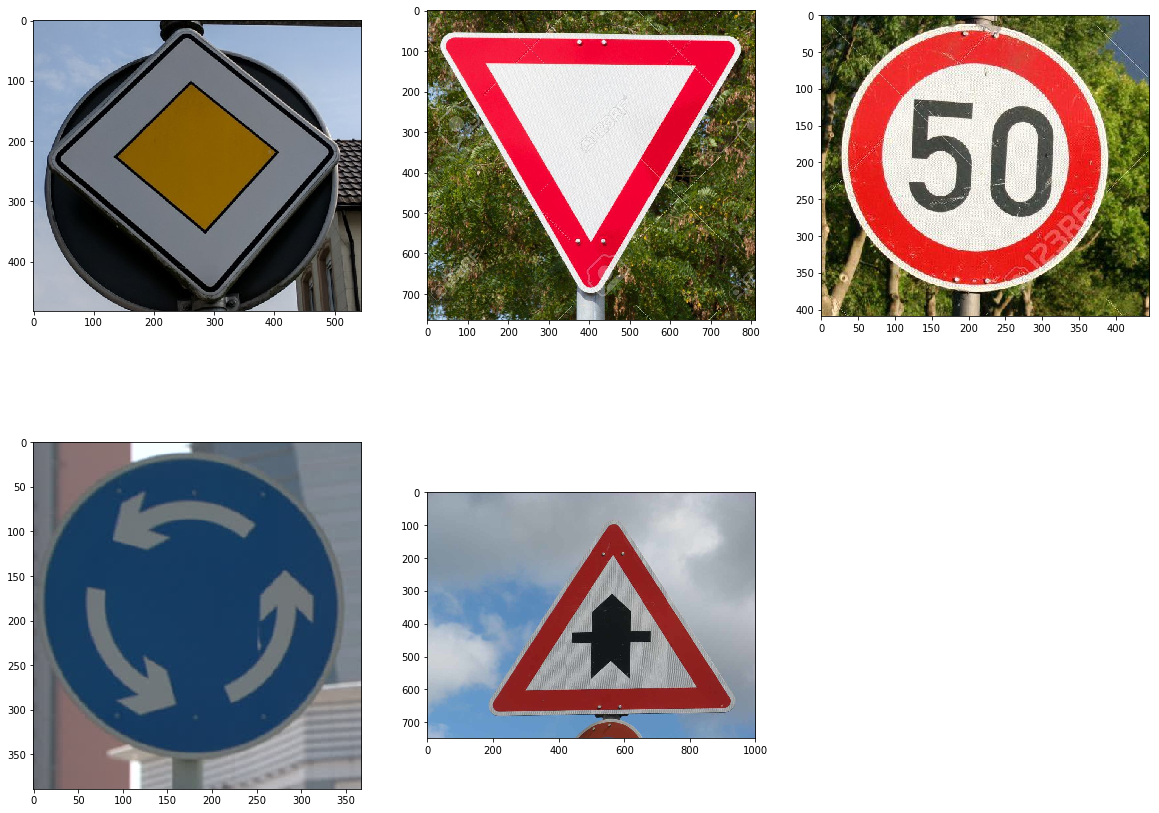

In [46]:
import glob
import PIL
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

folder = 'new_images'
images = glob.glob(folder+'/*')

num_images = len(images)

counter = 0
plt.figure(figsize=(20,40))

for it in images:
    image = cv2.imread(it)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    plt.subplot(num_images, 3, counter+1)
    plt.imshow(image)
    counter += 1

In [78]:
images

['new_images/Priority-768x765.jpg',
 'new_images/32842016-german-road-sign-give-way.jpg',
 'new_images/3677862-speed-limit-sign-in-germany.jpg',
 'new_images/9.jpg',
 'new_images/100_1607.jpg']

### Predict the Sign Type for Each Image

#### Pre-process Images

In [48]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
image_list = []

for it in images:
    image = cv2.imread(it)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resize = cv2.resize(image, (32,32))
    image_list.append(resize)

new_arr = np.array(image_list)

In [49]:
new_arr.shape

(5, 32, 32, 3)

In [58]:
processed_data = new_arr/256

In [51]:
image_list = [12, 13, 2, 40, 11]

#### Predict new images

In [62]:
saver = tf.train.Saver()
preds = []

with tf.Session() as sess:
    saver.restore(sess, 'model/model_5450.ckpt') # issue with size
    print("Model restored.")
    #for image in processed_data:
    predictions = sess.run(logits, feed_dict={x: processed_data, kp_prob: 1.0})

predictions.shape

INFO:tensorflow:Restoring parameters from model/model_5450.ckpt
Model restored.


(5, 43)

In [64]:
for item in predictions:
    print(np.argmax(item))

12
13
1
40
11


predicted the third image wrong - class 1 is 30kpmh which is pretty similar to 50

### Analyze Performance

In [141]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [65]:
saver = tf.train.Saver()

with tf.Session() as sess:
    saver.restore(sess, 'model/model_5450.ckpt') # issue with size
    print("Model restored.")
    test_accuracy = evaluate(processed_data, image_list)
    print("New Data Accuracy = {:.2f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from model/model_5450.ckpt
Model restored.
New Data Accuracy = 0.80


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [142]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

In [79]:
saver = tf.train.Saver()
preds = []

with tf.Session() as sess:
    saver.restore(sess, 'model/model_5450.ckpt') # issue with size
    print("Model restored.")
    #for image in processed_data:
    predictions = sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=5), feed_dict={x: processed_data, kp_prob: 1.0})

print(predictions)

INFO:tensorflow:Restoring parameters from model/model_5450.ckpt
Model restored.
TopKV2(values=array([[1.0000000e+00, 4.0425144e-28, 3.6311235e-32, 2.5047176e-35,
        7.9980762e-37],
       [1.0000000e+00, 2.3394677e-35, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00],
       [9.5855039e-01, 3.3128839e-02, 6.6898325e-03, 1.6309464e-03,
        3.7002232e-09],
       [9.8432678e-01, 9.9449940e-03, 3.2407718e-03, 9.6497382e-04,
        9.2859223e-04],
       [9.9998569e-01, 1.4121766e-05, 2.0367558e-07, 2.2408408e-08,
        1.0190992e-09]], dtype=float32), indices=array([[12, 10, 42, 17, 26],
       [13, 35,  0,  1,  2],
       [ 1,  4,  2,  0, 17],
       [40, 37, 34, 36, 39],
       [11, 30, 26, 21, 27]], dtype=int32))


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [143]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")